In [1]:
import numpy as np
import pandas as pd
import risk_kit as erk
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [3]:
def bt_mix(r1,r2, allocator, **kwargs):
    """
    Run a backtest between 2 sets
    """
    
    if not r1.shape == r2.shape:
        raise ValueError("r1 and r2 need to be in the same shape")
    weights = allocator(r1,r2, **kwargs)
    if not weights.shape == r1.shape:
        raise ValueError('Allocator returned weights that dont match r1')
    r_mix = weights*r1 +(1-weights)*r2
    return r_mix

In [4]:
def fixedmix_allocator(r1,r2,w1,**kwargs):
    """
    produces a time series
    """
    return pd.DataFrame(data=w1, index= r1.index, columns = r1.columns)

In [6]:
rates, zc_prices = erk.cir(10,500,b=0.03, r_0 = 0.03)
price_10 = erk.bond_price(10,100,.05,12,rates)
price_30 = erk.bond_price(30,100,.05,12,rates)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)


In [7]:
rets_bonds = bt_mix(rets_10,rets_30,allocator=fixedmix_allocator, w1 = 0.6)

In [9]:
rets_bonds

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,-0.0113657,0.0185033,0.0133389,0.00070843,0.0123534,-0.0163296,0.0416326,-0.0136538,0.0353115,0.0231832,...,0.0103683,-0.0222111,0.0104785,-0.0546341,0.0424713,-0.0127996,0.021344,0.00779169,0.036829,0.033505
2,0.000439859,0.0456303,-0.0167062,-0.00996737,0.0268018,-0.0218907,-0.0424547,0.0125316,0.00747726,-0.0505253,...,-0.013544,0.0693738,-0.0165823,0.0175846,-0.0162442,0.0259542,-0.0129219,0.0368409,0.0475477,-0.0253276
3,0.0385895,-0.0419229,-0.00325568,-0.0167037,-0.0171382,-0.00450692,0.0103503,-0.0398176,0.00667682,0.056038,...,0.0225477,0.00417543,0.0719088,-0.0196857,0.0227264,-0.0291109,0.0027863,0.0493468,-0.042867,-0.00433282
4,-0.0188137,0.00671981,-0.00444715,0.0111282,0.0873539,0.00651071,0.0105779,0.0137522,-0.0283907,0.00376874,...,0.0444445,-0.0299127,0.0187451,-0.0237351,-0.0375774,0.000703897,0.0281247,0.050354,-0.0264792,-0.0293235
5,0.0332243,0.0195186,-0.0161629,0.09091,0.0405055,-0.0194323,0.0534037,-0.0452245,-0.0269247,0.00936671,...,0.0351288,0.0440343,-0.0333322,-0.0110575,-0.00212366,-0.0177181,-0.00633211,0.00552613,-0.0142784,-0.0533004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-0.002979,-0.00784308,0.0053342,-0.0131162,0.00876906,0.0370267,0.00194124,-0.00563641,-0.0122853,0.0109487,...,-0.0127225,0.00518929,0.0185095,-0.0180672,0.0105305,-0.00012916,0.000550123,-0.0173902,-0.0147225,0.00153649
117,0.0145969,0.00956184,0.0175622,-0.00777238,-0.00987772,-0.00596697,-0.000499639,-0.00638172,0.0308631,0.021859,...,-0.0177167,0.00699415,-0.0157769,-0.029187,-0.00421024,-0.0103054,0.00277448,0.00812094,0.0264609,0.00997738
118,0.0249676,-0.00460787,-0.00749103,0.0116259,-0.00508279,-0.00146516,-0.00705558,0.00474953,-0.0253755,0.0131659,...,-0.00145574,-0.0220222,0.0175144,0.0132424,0.0142184,-0.0055608,-0.00272936,0.0199717,-0.00376784,0.000795683
119,-0.000914913,-0.00972004,0.0125579,0.00797585,-0.0107637,-0.00380631,-0.00226087,0.0301164,0.0151983,-0.000380624,...,0.00347006,0.000645268,0.0106416,-0.000457369,0.0117116,0.000768303,0.015008,-0.0157981,0.0460577,-0.0084439


In [10]:
mean_rets_bonds = rets_bonds.mean(axis = 'columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized vol,Skewness,Kurtosis,Cornish-Fisher Value at Risk (5%),Historic CVar (5%),Sharpe Ratio,Annualized Sharp,Max Drawdown
0,0.036365,0.003767,-0.028879,3.880112,-0.001211,-0.000746,1.644691,-0.000893,-0.000893


In [11]:
price_eq = erk.gbm(n_years = 10, n_scenarios=500, mu=0.07, sigma= 0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [15]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.fixedmix_allocator, w1=0.07)
rets_7030b_mean = rets_7030b.mean(axis = 'columns')
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized vol,Skewness,Kurtosis,Cornish-Fisher Value at Risk (5%),Historic CVar (5%),Sharpe Ratio,Annualized Sharp,Max Drawdown
0,0.038492,0.003524,-0.065093,3.938687,-0.001487,-0.001004,2.345749,-0.000428,-0.000428


In [16]:
summaries = erk.summary_stats(rets_7030b)

In [18]:
summaries.head()

,Annualized Return,Annualized vol,Skewness,Kurtosis,Cornish-Fisher Value at Risk (5%),Historic CVar (5%),Sharpe Ratio,Annualized Sharp,Max Drawdown
0,0.040546,0.066572,0.219191,2.847523,0.026828,0.032226,0.154104,-0.220844,-0.220844
1,0.043262,0.072201,0.291628,3.240305,0.028536,0.037054,0.178683,-0.129112,-0.129112
2,0.030992,0.068851,0.112463,2.607908,0.029333,0.035768,0.013937,-0.126653,-0.126653
3,0.030219,0.076333,0.671489,4.026648,0.028543,0.037063,0.002704,-0.118771,-0.118771
4,0.029675,0.054134,1.264437,7.531083,0.015554,0.025295,-0.005904,-0.047937,-0.047937


In [20]:
summaries.mean()

Annualized Return                    0.035656
Annualized vol                       0.074194
Skewness                             0.294483
Kurtosis                             3.863359
Cornish-Fisher Value at Risk (5%)    0.029835
Historic CVar (5%)                   0.039707
Sharpe Ratio                         0.079802
Annualized Sharp                    -0.145670
Max Drawdown                        -0.145670
dtype: float64

In [27]:
def terminal_values(rets):
    """
    Returns the final value of a dollar at the end of the return period
    """
    
    return (rets+1).prod()

In [29]:
pd.concat([
    erk.terminal_stats(rets_bonds, name = 'FI'),
    erk.terminal_stats(rets_eq, name = 'Eq'),
    erk.terminal_stats(rets_7030b, name = '70/30b')
], axis = 1)

,FI,Eq,70/30b
mean,1.388907,1.914077,1.423282
std,0.100666,0.941708,0.107098
p_breach,NaN,0.060000,NaN
e_short,NaN,0.148734,NaN
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [30]:
import seaborn as sns

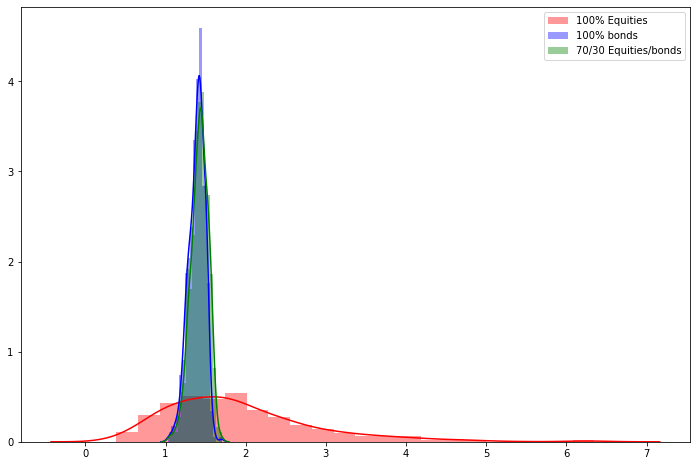

In [34]:
plt.figure(figsize = (12,8))
sns.distplot(erk.terminal_values(rets_eq), color = 'red', label = '100% Equities')
sns.distplot(erk.terminal_values(rets_bonds), color = 'blue', label = '100% bonds')
sns.distplot(erk.terminal_values(rets_7030b), color = 'green', label = '70/30 Equities/bonds')
plt.legend()

### glide paths for allocation

In [35]:
def glidepath_allocator(r1,r2, start_glide = 1, end_glide = 0):
    """
    Simulates a target-Date-Fund Style gradual move from r1 to r2
    """
    
    n_points = r1.shape[0]
    n_columns = r1.shape[1]
    path = pd.Series(data = np.linspace(start_glide, end_glide, num = n_points))
    paths = pd.concat([path]*n_columns, axis = 'columns')
    paths.index = r1.index
    paths.columns = r1.columns
    return paths

In [37]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.glidepath_allocator, start_glide = 0.8, end_glide = 0.2)

In [39]:
rets_g8020

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.0459869,-0.00343324,0.00955008,-0.0055348,-0.0115223,-0.0154135,-0.0159449,0.0192938,-0.0463447,-0.0308915,...,0.0345178,-0.0389817,0.0500792,-0.0586648,0.0482149,-0.0208929,0.02704,0.0144561,0.0770981,-0.0266386
2,0.0216134,0.0016921,0.0322383,-0.00810621,0.0684692,-0.0313297,0.0398511,0.0220296,-0.019276,0.025379,...,-0.0730011,0.0145404,-0.0569057,0.0126652,-0.00151758,0.0386648,0.0151753,-0.00655438,0.0254511,-0.0385107
3,-0.0475007,0.0217402,0.00894922,0.0240777,-0.0511433,0.0140752,-0.0092691,-0.0317777,0.0358487,0.0942287,...,0.0331528,-0.0016083,0.0466547,0.0831356,-0.0118512,0.00258192,-0.0169219,0.0430836,0.0294573,0.0380133
4,0.0088189,0.0217617,0.00949663,0.0025936,0.00766228,-0.00481462,-0.0422514,0.00832963,0.012123,-0.00878703,...,-0.0157483,-0.0144763,0.0134326,-0.0437055,-0.0137068,-0.0335558,0.0378934,0.000281841,-0.0184634,-0.0116699
5,-0.00780305,-0.00234238,0.0625105,0.0427754,-0.00571504,-0.0102458,0.0113509,-0.01992,-0.013624,-0.00422353,...,-0.0392689,0.0359896,-0.0154768,0.0249915,0.00475678,0.0226024,-0.0237344,0.0246254,0.0120335,0.0141359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-0.0113173,0.00817477,0.0193808,0.00180806,0.0014796,0.0167582,0.0203314,-0.0121023,-0.0132698,0.0158373,...,-0.00413524,-0.00292423,0.00997069,-0.0186439,0.00399352,0.00695585,0.0101613,-0.0137971,-0.0129873,-0.00241839
117,0.0156058,-0.00122291,0.0127622,-0.00956054,-0.00838015,-0.0104343,-0.00159689,-0.0082863,0.0279123,0.0136931,...,-0.00920233,0.00348747,0.00210732,-0.048976,-0.00599356,-0.0220142,-0.00543279,-0.000133408,0.0340469,0.00719111
118,0.0220897,0.00803631,0.00744094,-0.0087622,-0.00496689,0.00727293,0.00112817,0.000655336,-0.0303242,0.00752289,...,0.00276052,-0.0182755,0.025318,0.0131785,0.0329151,0.00267771,0.00493442,0.0223996,-0.0022303,-0.00236277
119,-0.00311366,0.00208961,0.0222851,0.00922866,-0.00785199,-0.0137244,-0.0106983,0.0431265,0.00668655,0.00162067,...,0.0164341,0.00314303,-0.00739182,0.0049866,0.00527553,0.0111874,0.00892574,-0.0198928,0.0292597,-0.0104661


In [41]:
pd.concat([
    erk.terminal_stats(rets_bonds, name = 'FI'),
    erk.terminal_stats(rets_eq, name = 'Eq'),
    erk.terminal_stats(rets_7030b, name = '70/30b'),
    erk.terminal_stats(rets_g8020, name = 'glide 80 to 20')
], axis = 1)

,FI,Eq,70/30b,glide 80 to 20
mean,1.388907,1.914077,1.423282,1.646822
std,0.100666,0.941708,0.107098,0.422368
p_breach,NaN,0.060000,NaN,0.004000
e_short,NaN,0.148734,NaN,0.029291
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


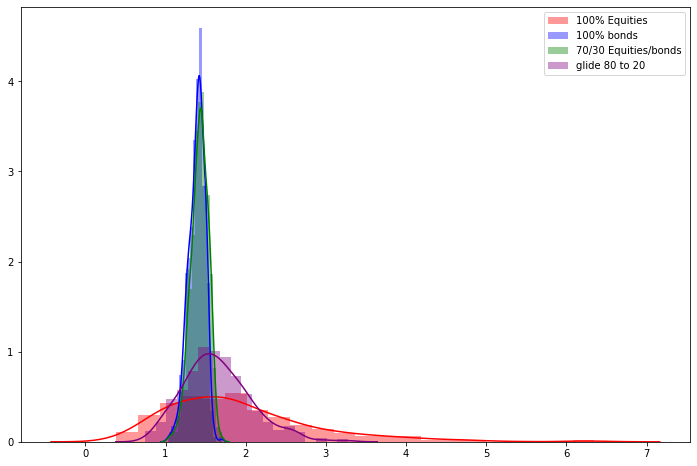

In [44]:
plt.figure(figsize = (12,8))
sns.distplot(erk.terminal_values(rets_eq), color = 'red', label = '100% Equities')
sns.distplot(erk.terminal_values(rets_bonds), color = 'blue', label = '100% bonds')
sns.distplot(erk.terminal_values(rets_7030b), color = 'green', label = '70/30 Equities/bonds')
sns.distplot(erk.terminal_values(rets_g8020), color = 'purple', label = 'glide 80 to 20')
plt.legend()